# Approaching (Almost) Any Machine Learning Problem

In [1]:
from sklearn import datasets, manifold, tree, metrics, model_selection

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Table of Content

* [Supervised vs Unsupervised Learning](#Supervised-vs-Unsupervised-Learning)
* [Cross-Validation](#Cross-Validation)
* [Evaluation Metrics](#Evaluation-Metrics)

## Supervised vs Unsupervised Learning

In [10]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

pixel_values, targets = data
targets = targets.astype(int)

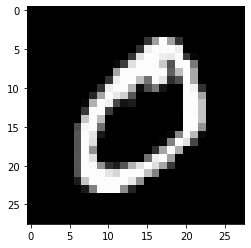

In [11]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [14]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [15]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x','y','targets']
)

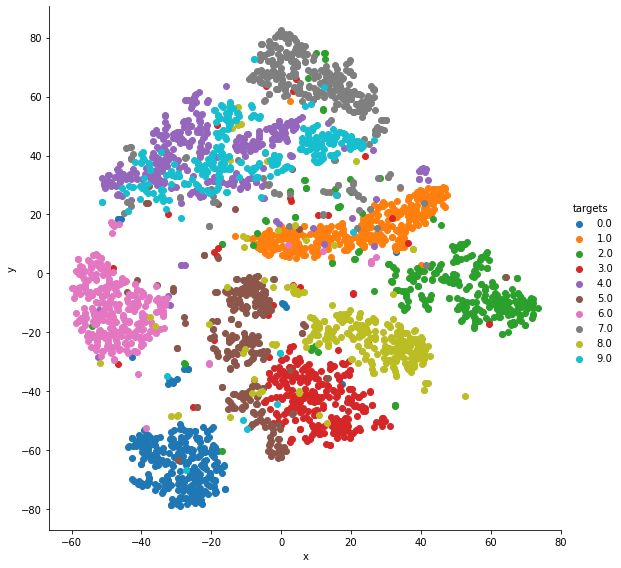

In [17]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

## Lessons Learned

* Difference between supervised and unsupervised learning
    * **Supervised Learning:** Data is labeled, and the task at hand is to use a model that'll learn from labelled data to predict the label of new data
    * **Unsupervised Learning:** Data is not labeled, and the task at hand is to use a model that can group data points based on similar characteristics

* How to convert a supervised dataset to a unsupervised dataset to better visualize high-dimensional datasets:
    * A decomposition technique, such as t-SNE or PCA, can be used to reduce the dimensionality of your dataset and visualize it

## Cross-Validation

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Although `quality` can take any value between 0 and 10, our dataset only contains 6 different values

In [4]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function in pandas with
#any dictionary to convert the values in a
#given column to values in a dictionary
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [5]:
df['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [6]:
# Return a random sample of items
# frac (fraction) indicates the fraction of the dataset to return (1 = 100%)
# Reset index since they change after shuffling the df
df = df.sample(frac=1).reset_index(drop=True)

# Select top 1000 rows for training
df_train = df.head(1000)

# Select bottom 599 for testing/validation
df_test = df.tail(599)

Let's train a decision tree classifier with maximum depth of 3 on this dataset

In [7]:
# Initialize decision tree with maximum depth as 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# Get all the columns that'll be used as features
# ignoring the target variable "quality"
cols = df.loc[:,:'alcohol'].columns

# Fit decision tree classifier on training data
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [8]:
# Generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# Generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# Calculate accuracy on training data
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# Calculate accuracy on test data
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

print(f'training accuracy is {train_accuracy*100}%')
print(f'test accuracy is {test_accuracy*100}%')

training accuracy is 62.0%
test accuracy is 52.42070116861436%


Let's try again with maximum depth of 5

In [9]:
# Initialize decision tree with maximum depth as 5
clf = tree.DecisionTreeClassifier(max_depth=5)

# Fit decision tree classifier on training data
clf.fit(df_train[cols], df_train.quality)

# Generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# Generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# Calculate accuracy on training data
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# Calculate accuracy on test data
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

print(f'training accuracy is {train_accuracy*100}%')
print(f'test accuracy is {test_accuracy*100}%')

training accuracy is 69.6%
test accuracy is 54.09015025041736%


Both training and test accuracy went up as we increased the maximum depth of our tree. Next, let's loop through various numbers of `max_depth` values and see which one gives us better accuracy for both our training and test sets

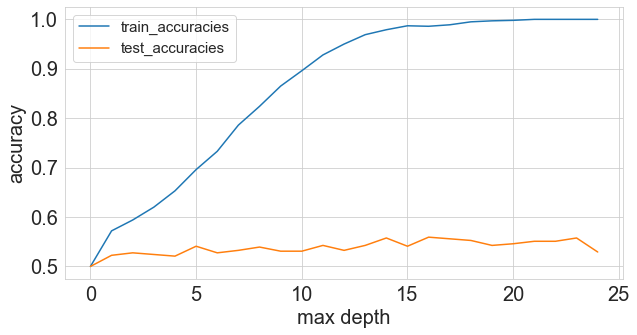

In [10]:
# Set global size of label text on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# Lists to store accuracies for both
# training and test sets. We initialize them
# to 50
training_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    # Initialize decision tree with maximum depth as depth
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # Get all the columns that'll be used as features
    # ignoring the target variable "quality"
    cols = df.loc[:,:'alcohol'].columns
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    # Generate predictions on the training set
    train_predictions = clf.predict(df_train[cols])

    # Generate predictions on the test set
    test_predictions = clf.predict(df_test[cols])
    
    
    # Calculate accuracy on training data
    training_accuracies += [metrics.accuracy_score(
        df_train.quality, train_predictions
    )]

    # Calculate accuracy on test data
    test_accuracies += [metrics.accuracy_score(
        df_test.quality, test_predictions
    )]

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(training_accuracies, label='train_accuracies')
plt.plot(test_accuracies, label='test_accuracies')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

We see that the training accuracy continues to increase as we increase the `max_depth` of our decision tree, while the test data platos at a certain point. This indicates that our model is **overfitting** i.e. it learns the training set so well, that it is no longer able to generalize and perform properly on a different dataset. 

There's also a less obvious problem with the way we've done things: We manually split our data so that 1000 points are used for training while 600 are used for testing. Ideally, we want to maximise the number of points the model sees in both of these sets i.e. we want the model to learn from all the points in the model, as well as get tested using all the points.

The solution to both problems is to train using cross validation. The following code snippet will perform **k-fold cross-validation** on our wine quality dataset. We will use 5 folds. Each fold will get a chance to be used as the test set, while the four other folds will be used for training. We will then average out the results obtained from all folds

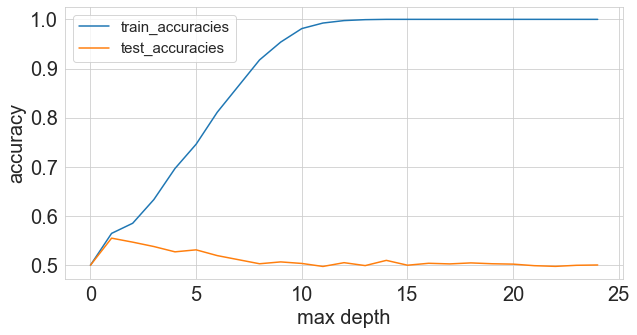

In [14]:
def k_fold_cv(dataset_path, output_path):
    df = pd.read_csv(dataset_path)
    
    df['kfold'] = -1 # add kfold column and fill vals with -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    kf = model_selection.KFold(n_splits=5)
    
    # Fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] =  fold
    
    df.to_csv(output_path, index=False)

dataset_path = 'winequality-red.csv'
output_path = 'k_fold_train.csv'
k_fold_cv(dataset_path, output_path)

# Get all the columns that'll be used as features
# ignoring the target variable "quality"
cols = df.loc[:,:'alcohol'].columns

df = pd.read_csv(output_path)

max_depth = [depth for depth in range(1,25)]
fold_train_acc = {x: [0.5] for x in range(5)}
fold_test_acc = {x: [0.5] for x in range(5)}

for fold in range(5):
    for depth in range(1,25):
        
        df_train = df[df['kfold'] == fold]
        df_test =  df[df['kfold'] != fold]
        
        # Initialize decision tree with maximum depth as depth
        clf = tree.DecisionTreeClassifier(max_depth=depth)

        # fit the model on given features
        clf.fit(df_train[cols], df_train.quality)

        # Generate predictions on the training set
        train_predictions = clf.predict(df_train[cols])

        # Generate predictions on the test set
        test_predictions = clf.predict(df_test[cols])


        # Calculate accuracy on training data
        fold_train_acc[fold] += [metrics.accuracy_score(
            df_train.quality, train_predictions
        )]

        # Calculate accuracy on test data
        fold_test_acc[fold] += [metrics.accuracy_score(
            df_test.quality, test_predictions
        )]

# Compute average accross all folds
training_accuracies = pd.DataFrame(fold_train_acc).mean(axis=1)
test_accuracies = pd.DataFrame(fold_test_acc).mean(axis=1)

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(training_accuracies, label='train_accuracies')
plt.plot(test_accuracies, label='test_accuracies')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

In [15]:
training_accuracies

0     0.500000
1     0.564732
2     0.585359
3     0.633497
4     0.696667
5     0.746089
6     0.811134
7     0.864303
8     0.917465
9     0.953736
10    0.981250
11    0.992500
12    0.997500
13    0.999375
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    1.000000
19    1.000000
20    1.000000
21    1.000000
22    1.000000
23    1.000000
24    1.000000
dtype: float64

In [17]:
test_accuracies

0     0.500000
1     0.555034
2     0.546905
3     0.537997
4     0.527209
5     0.531271
6     0.519546
7     0.511260
8     0.502970
9     0.506723
10    0.503595
11    0.497499
12    0.505159
13    0.499218
14    0.509849
15    0.500001
16    0.503909
17    0.502659
18    0.504692
19    0.502971
20    0.502190
21    0.499062
22    0.497656
23    0.499844
24    0.500471
dtype: float64

We're still overfitting. Let's see if we can use a different kind of cross-validation to avoid overfitting, **stratified k-fold**. Stratified k-fold is used when there's an imbalance in your dataset. If the majority of the data points are of a similar class, then simple k-fold could result in a scenario where you're training/testing on data that includes only one class. Stratified k-fold alleviates this problem by ensuring that a certain fraction of each class is present in all folds e.g. 10% of our wine quality training/testing folds have a score of 5, 20% have a score of 2, so on and so forth

First, let's determine whether or not our wine quality dataset is imbalanced

Text(0, 0.5, 'count')

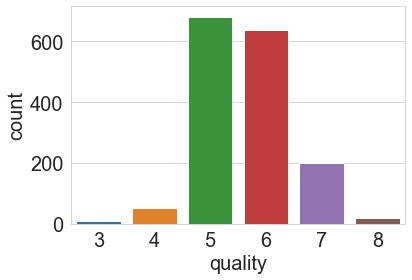

In [18]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Clear imbalance, so we should use stratified k-fold instead. The code bellow performs stratified k-fold and plots the average accross all folds

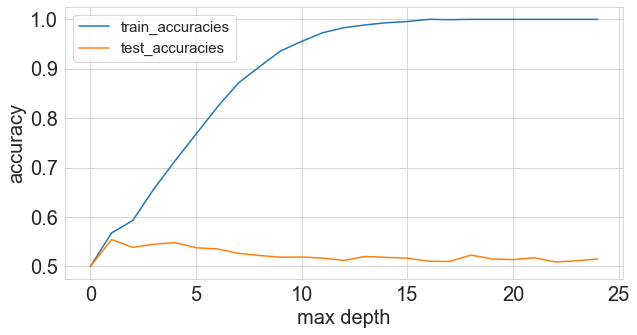

In [19]:
def stratified_k_fold_cv(dataset_path, output_path):
    df = pd.read_csv(dataset_path)
    
    df['kfold'] = -1 # add kfold column and fill vals with -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    y = df.quality.values
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # Fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)):
        df.loc[val_, 'kfold'] =  fold
    
    df.to_csv(output_path, index=False)

dataset_path = 'winequality-red.csv'
output_path = 'stratified_k_fold_train.csv'
stratified_k_fold_cv(dataset_path, output_path)

# Get all the columns that'll be used as features
# ignoring the target variable "quality"
cols = df.loc[:,:'alcohol'].columns

df = pd.read_csv(output_path)

max_depth = [depth for depth in range(1,25)]
fold_train_acc = {x: [0.5] for x in range(5)}
fold_test_acc = {x: [0.5] for x in range(5)}

for fold in range(5):
    for depth in range(1,25):
        
        df_train = df[df['kfold'] == fold]
        df_test =  df[df['kfold'] != fold]
        
        # Initialize decision tree with maximum depth as depth
        clf = tree.DecisionTreeClassifier(max_depth=depth)

        # fit the model on given features
        clf.fit(df_train[cols], df_train.quality)

        # Generate predictions on the training set
        train_predictions = clf.predict(df_train[cols])

        # Generate predictions on the test set
        test_predictions = clf.predict(df_test[cols])


        # Calculate accuracy on training data
        fold_train_acc[fold] += [metrics.accuracy_score(
            df_train.quality, train_predictions
        )]

        # Calculate accuracy on test data
        fold_test_acc[fold] += [metrics.accuracy_score(
            df_test.quality, test_predictions
        )]

# Compute average accross all folds
training_accuracies = pd.DataFrame(fold_train_acc).mean(axis=1)
test_accuracies = pd.DataFrame(fold_test_acc).mean(axis=1)

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(training_accuracies, label='train_accuracies')
plt.plot(test_accuracies, label='test_accuracies')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

In [21]:
training_accuracies

0     0.500000
1     0.567855
2     0.592872
3     0.656665
4     0.713570
5     0.767982
6     0.822384
7     0.871156
8     0.904295
9     0.936187
10    0.955578
11    0.973096
12    0.983107
13    0.988740
14    0.993115
15    0.995619
16    1.000000
17    0.999375
18    1.000000
19    1.000000
20    1.000000
21    1.000000
22    1.000000
23    1.000000
24    1.000000
dtype: float64

In [22]:
test_accuracies

0     0.500000
1     0.554408
2     0.538616
3     0.544871
4     0.548308
5     0.537832
6     0.535487
7     0.526577
8     0.522200
9     0.518607
10    0.519076
11    0.516886
12    0.512198
13    0.520172
14    0.518294
15    0.516733
16    0.510633
17    0.510010
18    0.522986
19    0.515168
20    0.513761
21    0.517667
22    0.509068
23    0.511417
24    0.515167
dtype: float64

Up to now we've only seen how CV works with classification problems, but we can also use CV for regression problems. 

basic k-fold CV the way we did it for classification is directly applicable to regression problems. Before we can use stratified k-fold however, we need to split our data into bins based on the target variable's distribution. Let's do this on a simple regression dataset

In [30]:
def regression_stratified_k_fold(data):
    data['kfolds'] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    
    # Caluclate the number of bins using Sturge's rule
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    data = data.drop('bins', axis=1)
    
    return data

X, y = datasets.make_regression(
    n_samples=1500, n_features=100, n_targets=1
)

df = pd.DataFrame(X, columns=[f'f_{i}' for i in range(X.shape[1])])

df.loc[:, 'target'] = y

df = regression_stratified_k_fold(df)
df

/Users/akhanafer/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfolds,kfold
0,-0.937262,1.512393,0.964467,-0.004427,0.655509,-0.765725,-1.528370,0.470390,-1.189536,2.365757,...,0.576097,-0.098374,-0.285212,1.778119,0.147858,-1.298966,1.007721,-276.806001,-1,0.0
1,0.337305,1.261522,1.035709,-1.058586,0.959945,1.162003,-2.048902,-0.122586,-0.715783,-1.517175,...,-0.873548,-0.373296,0.762969,1.277331,-0.358196,0.669066,0.983084,139.182278,-1,0.0
2,-1.005932,1.329141,-1.098667,-0.948429,0.299625,0.010541,2.555626,0.418355,-0.461151,-1.743250,...,-1.378218,-0.140950,1.160230,0.621442,0.645992,2.711590,0.884335,197.520353,-1,0.0
3,-0.257602,-0.284425,-0.120737,0.441752,-1.835592,0.116147,-0.947018,-0.210828,-0.621936,-0.442900,...,0.684652,0.556556,-1.721225,1.331493,0.420517,0.428308,-0.911484,90.789186,-1,0.0
4,-2.757304,-1.356520,1.331842,1.541733,-0.614684,-1.174929,1.516310,-0.004300,-0.792099,-1.256320,...,1.665020,-0.286786,1.361181,0.514120,0.305162,-1.848281,-2.412992,-354.271491,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.717012,1.811665,0.781065,-0.423897,1.935758,1.529926,2.281214,0.575716,0.403217,-0.041123,...,0.206911,-0.077096,0.086424,-0.443920,0.686980,-1.173676,-0.231376,-344.346775,-1,4.0
1496,1.012274,-3.383653,-1.277837,1.416092,-0.288330,-0.467670,-1.413893,-0.265695,-1.552161,-0.782823,...,0.007503,-1.308211,0.310420,-0.695601,-0.413225,1.107543,-0.190244,-262.291160,-1,4.0
1497,0.952089,0.088004,1.051706,-1.299520,0.704342,-0.355489,-0.279181,-2.111283,0.055281,-2.069656,...,-0.895375,-0.290206,1.322321,-0.016485,-0.022068,0.971575,1.173458,314.763477,-1,4.0
1498,0.554134,-0.298468,1.467459,-0.175397,-1.047945,-1.070323,1.064031,-0.188010,-0.974582,-1.420906,...,-0.485672,-0.142999,0.088072,-0.823331,-1.723174,0.310234,-0.596352,-218.692016,-1,4.0


## Lessons Learned

* The definition of overfitting:
    * When your model performs very well on the training data but poorly on the test dataset
* How to avoid overfitting using cross-validation
* The different types of cross-validation for both regression and classification problems:
    * k-fold
    * Stratified k-fold 
    * Group k-fold: used when a data point can span many rows e.g. in cancer-detection problems, a patient can have many MRIs, but we don't want such patient to be represented in both the training and the test set
* How to adapt CV for datasets that are too large or too small

## Evaluation Metrics